<a href="https://colab.research.google.com/github/gyujin0450/RPRG_PartII/blob/master/p207_%EC%BD%94%EB%94%A9%EB%B3%80%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ch07.5 코딩변경

In [ ]:
# 코딩변경이란 최초 코딩 내용을 용도에 맞게 변경하는 작업
# 데이터의 가독성과 척도 변경 그리고 역코딩 등의 목적을 수행

In [1]:
dataset <- read.csv("dataset.csv", header = T) # header가 있는 csv 파일 읽기
head(dataset)

,resident,gender,job,age,position,price,survey
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,1,1,26,2,5.1,1
2,2,1,2,54,5,4.2,2
3,NA,1,2,41,4,4.7,4
4,4,2,NA,45,4,3.5,2
5,5,1,3,62,5,5.0,1
6,3,1,2,57,NA,5.4,2


In [3]:
summary(dataset$resident)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.000   2.000   2.233   3.000   5.000      21 

In [13]:
dataset2 <- subset(dataset, resident != "NA")
summary(dataset2)

    resident         gender          job             age           position    
 Min.   :1.000   Min.   :0.00   Min.   :1.000   Min.   :20.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:28.75   1st Qu.:2.000  
 Median :2.000   Median :1.00   Median :2.000   Median :43.00   Median :4.000  
 Mean   :2.233   Mean   :1.43   Mean   :2.128   Mean   :42.97   Mean   :3.399  
 3rd Qu.:3.000   3rd Qu.:2.00   3rd Qu.:3.000   3rd Qu.:56.00   3rd Qu.:5.000  
 Max.   :5.000   Max.   :5.00   Max.   :3.000   Max.   :69.00   Max.   :5.000  
                                NA's   :13      NA's   :27      NA's   :21     
     price              survey     
 Min.   :-457.200   Min.   :1.000  
 1st Qu.:   4.400   1st Qu.:2.000  
 Median :   5.400   Median :3.000  
 Mean   :   7.213   Mean   :2.649  
 3rd Qu.:   6.300   3rd Qu.:3.000  
 Max.   : 675.000   Max.   :5.000  
 NA's   :30                        

In [14]:
# 가독성을 위한 코딩 변경
dataset2$resident2[dataset2$resident == 1] <- "1.서울"
dataset2$resident2[dataset2$resident == 2] <- "2.인천"
dataset2$resident2[dataset2$resident == 3] <- "3.대전"
dataset2$resident2[dataset2$resident == 4] <- "4.대구"
dataset2$resident2[dataset2$resident == 5] <- "5.제주"

In [15]:
str(dataset2)

'data.frame':	279 obs. of  8 variables:
 $ resident : int  1 2 4 5 3 2 5 2 5 3 ...
 $ gender   : int  1 1 2 1 1 2 1 1 2 1 ...
 $ job      : int  1 2 NA 3 2 1 2 2 NA 3 ...
 $ age      : int  26 54 45 62 57 36 NA 37 29 35 ...
 $ position : int  2 5 4 5 NA 3 3 3 2 2 ...
 $ price    : num  5.1 4.2 3.5 5 5.4 4.1 675 4.9 2.3 4.2 ...
 $ survey   : int  1 2 2 1 2 4 4 3 5 3 ...
 $ resident2: chr  "1.서울" "2.인천" "4.대구" "5.제주" ...


In [16]:
head(dataset2[c("resident","resident2")])

,resident,resident2
,<int>,<chr>
1,1,1.서울
2,2,2.인천
4,4,4.대구
5,5,5.제주
6,3,3.대전
7,2,2.인천


In [ ]:
# 척도 변경을 위한 코딩 변경
# 나이 변수는 21세 ~ 69세 분포를 갖는다. 이러한 분포를 대상으로 30세 이하는 "청년층"
# 31세~55세는 "중년층", 56세 이상은 "장년층" 으로 범주를 설정하는 방법
# 추론통계학에서는 범주형 변수를 대상으로만 추론과 검증이 가능한 분석 방법이 있는데
# 이를 위해 불가피하게 연속형 변수를 범주형 변수로 코딩을 변경해야 하는 경우

In [20]:
dataset2$age2[dataset2$age <= 30] <- "Young"
dataset2$age2[dataset2$age > 30 & dataset2$age <= 55] <- "Middle"
dataset2$age2[dataset2$age > 55] <- "Older"
head(dataset2)

,resident,gender,job,age,position,price,survey,resident2,age2
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>
1,1,1,1,26,2,5.1,1,1.서울,Young
2,2,1,2,54,5,4.2,2,2.인천,Middle
4,4,2,NA,45,4,3.5,2,4.대구,Middle
5,5,1,3,62,5,5.0,1,5.제주,Older
6,3,1,2,57,NA,5.4,2,3.대전,Older
7,2,2,1,36,3,4.1,4,2.인천,Middle


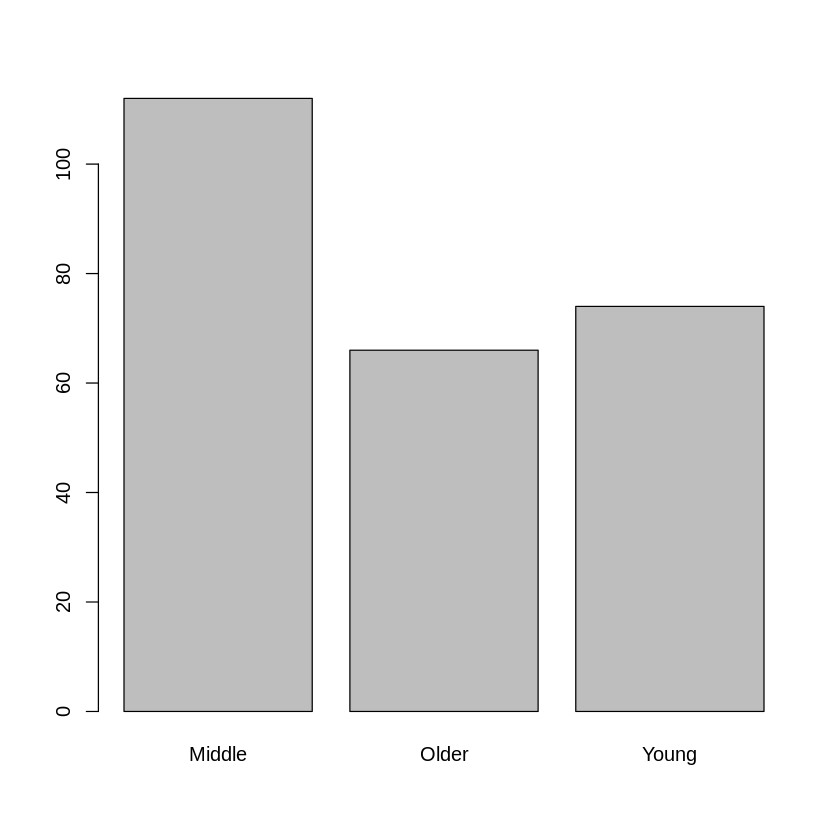

In [21]:
barplot(table(dataset2$age2))

In [29]:
## 역코딩을 위한 코딩 변경
# 만족도 평가를 위해서 설문지 문항은 (1)매우만족 ~ (5) 매우불만족 으로 작성됨
# 이러한 만족도 평가를 점수화하기 위해서는 매우만족(5점) ~ 매무불만족(1점) 으로 역순으로 변경함 
survay <- dataset2$survey
table(survay)
csurvay <-  6 - survay
table(csurvay)

survay
  1   2   3   4   5 
 16 111 113  33   6 

csurvay
  1   2   3   4   5 
  6  33 113 111  16 